Загрузка данных...

ПРОВЕРКИ КАЧЕСТВА ДАННЫХ

1. ПРОВЕРКА ПРОПУСКОВ:
Книги:
id                              0
book_id                         0
best_book_id                    0
work_id                         0
books_count                     0
isbn                          700
isbn13                        585
authors                         0
original_publication_year      21
original_title                585
title                           0
language_code                1084
average_rating                  0
ratings_count                   0
work_ratings_count              0
work_text_reviews_count         0
ratings_1                       0
ratings_2                       0
ratings_3                       0
ratings_4                       0
ratings_5                       0
image_url                       0
small_image_url                 0
dtype: int64

Рейтинги:
book_id    0
user_id    0
rating     0
dtype: int64

Теги книг:
goodreads_book_id    0
tag_id               0
count   

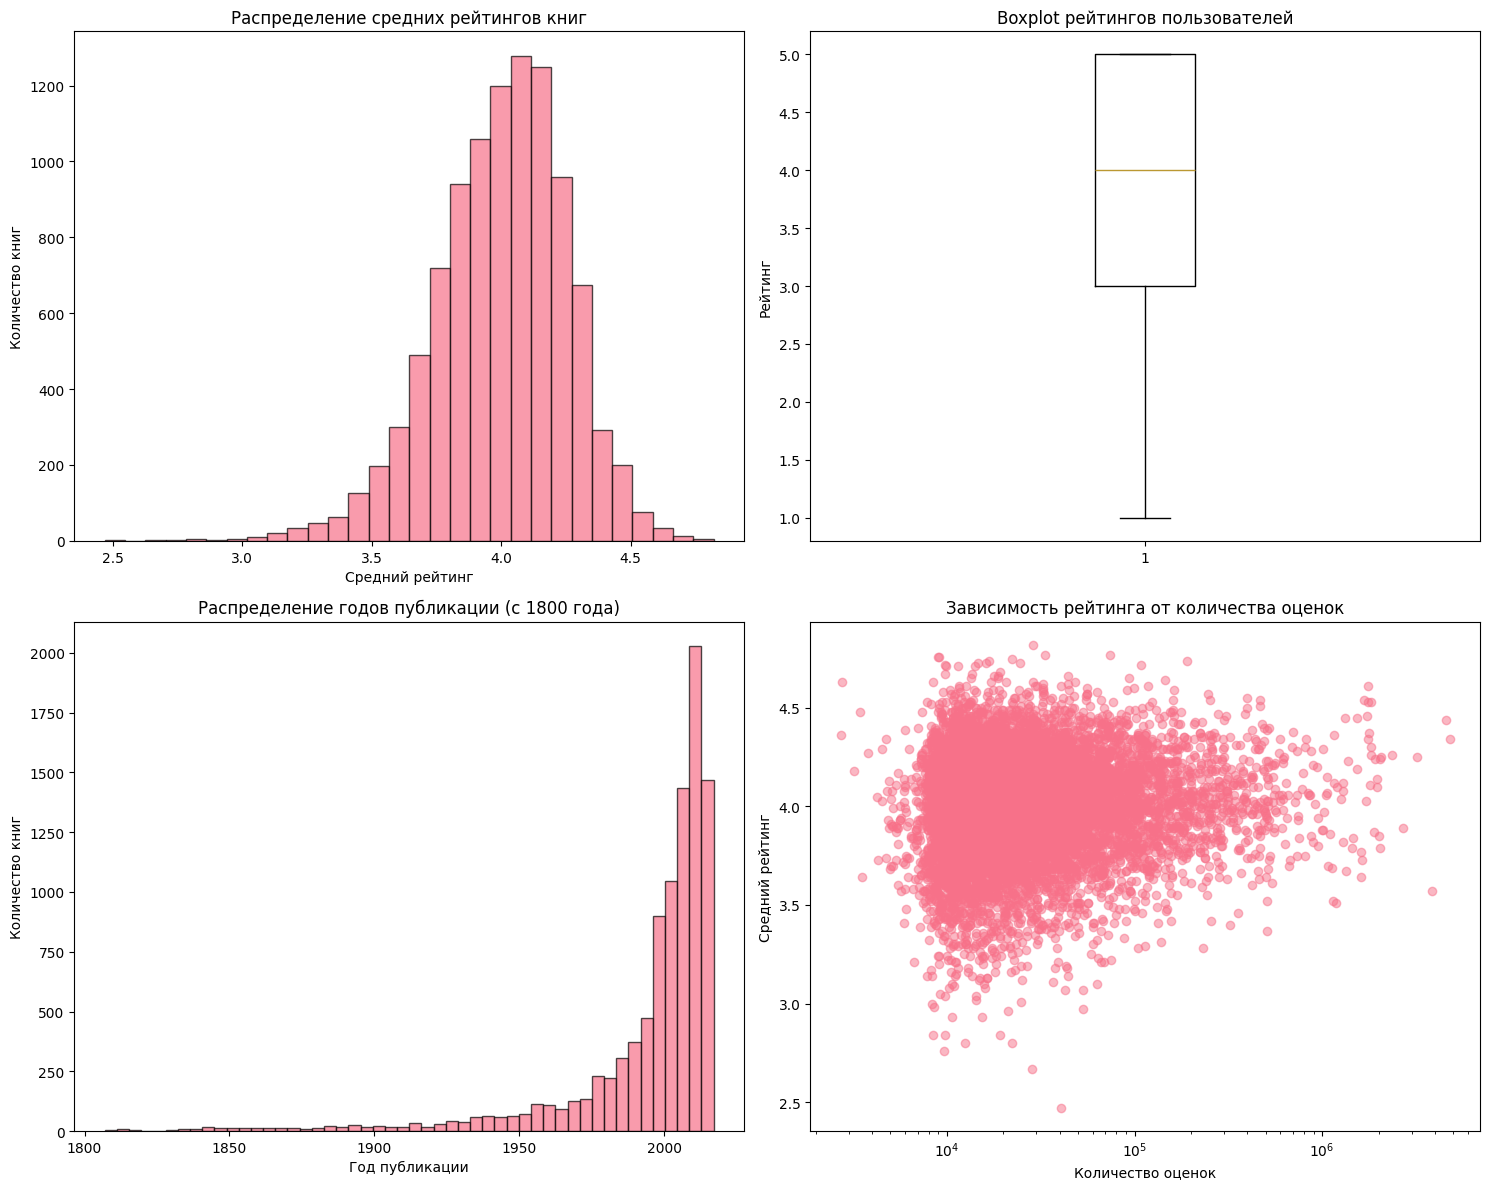


ТЕКСТОВЫЕ НАБЛЮДЕНИЯ

1. ТОП-5 самых оцениваемых книг:
                                                   title  average_rating  ratings_count
                 The Hunger Games (The Hunger Games, #1)            4.34        4780653
Harry Potter and the Sorcerer's Stone (Harry Potter, #1)            4.44        4602479
                                 Twilight (Twilight, #1)            3.57        3866839
                                   To Kill a Mockingbird            4.25        3198671
                                        The Great Gatsby            3.89        2683664

2. ТОП-5 языков книг:
language_code
eng      6341
en-US    2070
en-GB     257
ara        64
en-CA      58
Name: count, dtype: int64

3. СТАТИСТИКА АКТИВНОСТИ ПОЛЬЗОВАТЕЛЕЙ:
   - Среднее количество оценок на пользователя: 18.4
   - Максимальное количество оценок у пользователя: 200
   - Медианное количество оценок: 8.0

4. ТОП-10 самых популярных тегов:
   - to-read: 596234
   - to-read: 586235
   - to-read: 5058

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Настройка отображения
plt.style.use('default')
sns.set_palette("husl")

# Загрузка данных
print("Загрузка данных...")
books = pd.read_csv('archive/books.csv')
ratings = pd.read_csv('archive/ratings.csv')
book_tags = pd.read_csv('archive/book_tags.csv')
tags = pd.read_csv('archive/tags.csv')
to_read = pd.read_csv('archive/to_read.csv')

# 1. ПРОВЕРКИ КАЧЕСТВА ДАННЫХ

print("\n" + "="*50)
print("ПРОВЕРКИ КАЧЕСТВА ДАННЫХ")
print("="*50)

# 1.1 Проверка пропусков
print("\n1. ПРОВЕРКА ПРОПУСКОВ:")
print("Книги:")
print(books.isnull().sum())
print("\nРейтинги:")
print(ratings.isnull().sum())
print("\nТеги книг:")
print(book_tags.isnull().sum())

# 1.2 Проверка дубликатов
print("\n2. ПРОВЕРКА ДУБЛИКАТОВ:")
print(f"Дубликаты книг: {books.duplicated().sum()}")
print(f"Дубликаты рейтингов: {ratings.duplicated().sum()}")
print(f"Дубликаты пар книга-тег: {book_tags.duplicated().sum()}")

# 1.3 Проверка подозрительных значений
print("\n3. ПРОВЕРКА ПОДОЗРИТЕЛЬНЫХ ЗНАЧЕНИЙ:")

# Проверка рейтингов
print(f"Уникальные значения рейтингов: {sorted(ratings['rating'].unique())}")
print(f"Рейтинги вне диапазона 1-5: {ratings[(ratings['rating'] < 1) | (ratings['rating'] > 5)].shape[0]}")

# Проверка годов публикации
current_year = pd.Timestamp.now().year
suspicious_years = books[(books['original_publication_year'] < 1000) | 
                        (books['original_publication_year'] > current_year)]
print(f"Подозрительные годы публикации: {suspicious_years.shape[0]}")

# Проверка количества книг
suspicious_books_count = books[books['books_count'] <= 0]
print(f"Некорректное количество книг (<=0): {suspicious_books_count.shape[0]}")

# 2. БАЗОВЫЕ ГРАФИКИ

print("\n" + "="*50)
print("БАЗОВЫЕ ГРАФИКИ")
print("="*50)

# Создаем сетку графиков
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 2.1 Распределение рейтингов книг
axes[0, 0].hist(books['average_rating'].dropna(), bins=30, alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Распределение средних рейтингов книг')
axes[0, 0].set_xlabel('Средний рейтинг')
axes[0, 0].set_ylabel('Количество книг')

# 2.2 Boxplot рейтингов пользователей
axes[0, 1].boxplot(ratings['rating'])
axes[0, 1].set_title('Boxplot рейтингов пользователей')
axes[0, 1].set_ylabel('Рейтинг')

# 2.3 Распределение годов публикации
valid_years = books['original_publication_year'].dropna()
axes[1, 0].hist(valid_years[valid_years >= 1800], bins=50, alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Распределение годов публикации (с 1800 года)')
axes[1, 0].set_xlabel('Год публикации')
axes[1, 0].set_ylabel('Количество книг')

# 2.4 Scatter: рейтинг vs количество оценок
axes[1, 1].scatter(books['ratings_count'], books['average_rating'], alpha=0.5)
axes[1, 1].set_title('Зависимость рейтинга от количества оценок')
axes[1, 1].set_xlabel('Количество оценок')
axes[1, 1].set_ylabel('Средний рейтинг')
axes[1, 1].set_xscale('log')

plt.tight_layout()
plt.show()

# 3. ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ

print("\n" + "="*50)
print("ТЕКСТОВЫЕ НАБЛЮДЕНИЯ")
print("="*50)

# Наблюдение 1: Топ популярных книг
top_books = books.nlargest(5, 'ratings_count')[['title', 'average_rating', 'ratings_count']]
print("\n1. ТОП-5 самых оцениваемых книг:")
print(top_books.to_string(index=False))

# Наблюдение 2: Распределение языков
language_counts = books['language_code'].value_counts().head(5)
print(f"\n2. ТОП-5 языков книг:")
print(language_counts)

# Наблюдение 3: Активность пользователей
user_activity = ratings['user_id'].value_counts()
print(f"\n3. СТАТИСТИКА АКТИВНОСТИ ПОЛЬЗОВАТЕЛЕЙ:")
print(f"   - Среднее количество оценок на пользователя: {user_activity.mean():.1f}")
print(f"   - Максимальное количество оценок у пользователя: {user_activity.max()}")
print(f"   - Медианное количество оценок: {user_activity.median()}")

# Наблюдение 4: Анализ тегов
popular_tags = book_tags.merge(tags, on='tag_id').nlargest(10, 'count')
print(f"\n4. ТОП-10 самых популярных тегов:")
for _, row in popular_tags.iterrows():
    print(f"   - {row['tag_name']}: {row['count']}")

# Наблюдение 5: Качество данных
print(f"\n5. КАЧЕСТВО ДАННЫХ:")
print(f"   - Всего книг: {books.shape[0]}")
print(f"   - Всего оценок: {ratings.shape[0]}")
print(f"   - Всего пользователей: {ratings['user_id'].nunique()}")
print(f"   - Всего тегов: {tags.shape[0]}")
print(f"   - Пропусков в годах публикации: {books['original_publication_year'].isnull().sum()}")